# Tutorial 1

## Working with proteins and structures

In this notebook we will see the basics of protein and structure manipulation

In [1]:
# Some imports
import manas_cafa.bio.protein
from manas_cafa.bio.protein import Protein

Proteins will be handled following the Uniprot's XML format. When loading a protein, the package will attempt to load the protein's XML from the `uniprot_entries_path` folder. If the file is not found there, it will be downloaded from the Uniprot api, whose url is specified at `uniprot_entries_url`.

In [2]:
manas_cafa.bio.protein.uniprot_entries_path

'/data/uniprot/entries/'

In [3]:
manas_cafa.bio.protein.uniprot_entries_url

'https://rest.uniprot.org/uniprotkb/'

## Creating a protein object

To create a protein instance only needs its protein Uniprot code. To load its XML data, you just need to call the `load_uniprot` method.

In [4]:
protein = Protein('P01112')
protein.load_uniprot()


In this package, we will work mainly with protein sequences, GeneOntology(GO) terms and protein structures. If the XML data was loaded, you can ask for the protein sequence:

In [5]:
protein.sequence

'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLNPPDESGPGCMSCKCVLS'

For its GO terms:

In [6]:
protein.go_terms()[0:5]

[{'type': 'go',
  'id': 'GO:0005737',
  'properties': {'term': 'C:cytoplasm',
   'evidence': 'ECO:0000304',
   'project': 'ProtInc'}},
 {'type': 'go',
  'id': 'GO:0005829',
  'properties': {'term': 'C:cytosol',
   'evidence': 'ECO:0000314',
   'project': 'HPA'}},
 {'type': 'go',
  'id': 'GO:0005789',
  'properties': {'term': 'C:endoplasmic reticulum membrane',
   'evidence': 'ECO:0000304',
   'project': 'Reactome'}},
 {'type': 'go',
  'id': 'GO:0098978',
  'properties': {'term': 'C:glutamatergic synapse',
   'evidence': 'ECO:0000314',
   'project': 'SynGO'}},
 {'type': 'go',
  'id': 'GO:0005794',
  'properties': {'term': 'C:Golgi apparatus',
   'evidence': 'ECO:0000314',
   'project': 'UniProtKB'}}]

And for the list of its structures:

In [7]:
protein.structure_terms()[0:5]

[{'type': 'pdb',
  'id': '121P',
  'properties': {'method': 'X-ray',
   'resolution': '1.54 A',
   'chains': 'A=1-166'}},
 {'type': 'pdb',
  'id': '1AA9',
  'properties': {'method': 'NMR', 'chains': 'A=1-171'}},
 {'type': 'pdb',
  'id': '1AGP',
  'properties': {'method': 'X-ray',
   'resolution': '2.30 A',
   'chains': 'A=1-166'}},
 {'type': 'pdb',
  'id': '1BKD',
  'properties': {'method': 'X-ray',
   'resolution': '2.80 A',
   'chains': 'R=1-166'}},
 {'type': 'pdb',
  'id': '1CLU',
  'properties': {'method': 'X-ray',
   'resolution': '1.70 A',
   'chains': 'A=1-166'}}]

## Accessing GO parent and children terms of protein assigned terms

Given an obo file ─for this example we are using the GO full graph given by the CAFA5 competition organizators─ we can construct a graph (using `obonet` and `networkx` libraries) to ask for parent and childen terms of the terms assigned to the protein of interest:

In [8]:
g = Protein.build_graph('../cafa-5-protein-function-prediction/Train/go-basic.obo')

In [9]:
protein.go_terms_parents(graph=g, max_distance=1)[0:10]

['GO:2000348',
 'GO:0010990',
 'GO:0003202',
 'GO:0048340',
 'GO:1990574',
 'GO:0110032',
 'GO:2000342',
 'GO:0061742',
 'GO:0003412',
 'GO:0035766']

In [10]:
protein.go_terms_children(graph=g, max_distance=2)[0:10]

['GO:1900274',
 'GO:0042325',
 'GO:0009892',
 'GO:0043170',
 'GO:0072657',
 'GO:0045859',
 'GO:0032502',
 'GO:0120032',
 'GO:0048856',
 'GO:0031529']

## Working with protein structures

In [11]:
# Let's import the correspondent module
from manas_cafa.bio.structure import Structure

We just have to do as we did for `Protein` objects, in this case loading the PDB, the reference database for protein structures. 

In [12]:
structure = Structure(protein.structure_terms()[1]['id'])
structure.load_pdb()

We can ask, for example, about the structure chains. The structure attribute is just as a biopython structure object.

In [13]:
structure.get_chain_ids()

['A']

We can ask for the protein contact map, in this case the inner contacts for the chain A with 12 armstrong as a distance threshold:

In [14]:
structure.contact_map('A', 'A', 12)

array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Let's plot the contact map in a more comprehensive way to see which residues are in contact amongst them:

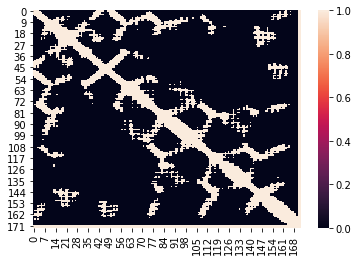

In [17]:
import seaborn as sns

sns.heatmap(structure.contact_map('A', 'A', 12))

Let's change the threshold to a more restrictive one:

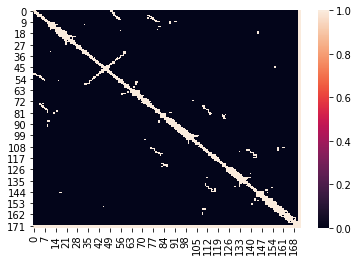

In [18]:
sns.heatmap(structure.contact_map('A', 'A', 6))